In [1]:
from datascience import *
import numpy as np

In [2]:
top = Table.read_table('top_movies_2017.csv')
top

Title,Studio,Gross,Gross (Adjusted),Year
Gone with the Wind,MGM,198676459,1796176700,1939
Star Wars,Fox,460998007,1583483200,1977
The Sound of Music,Fox,158671368,1266072700,1965
E.T.: The Extra-Terrestrial,Universal,435110554,1261085000,1982
Titanic,Paramount,658672302,1204368000,1997
The Ten Commandments,Paramount,65500000,1164590000,1956
Jaws,Universal,260000000,1138620700,1975
Doctor Zhivago,MGM,111721910,1103564200,1965
The Exorcist,Warner Brothers,232906145,983226600,1973
Snow White and the Seven Dwarves,Disney,184925486,969010000,1937


In [3]:
studios = top.select('Studio')
studios

Studio
MGM
Fox
Fox
Universal
Paramount
Paramount
Universal
MGM
Warner Brothers
Disney


In [13]:
# I want to see for each studio, how many times does it appear
studios_distribution = studios.group('Studio') # output in alphabetical order

# Bar Charts

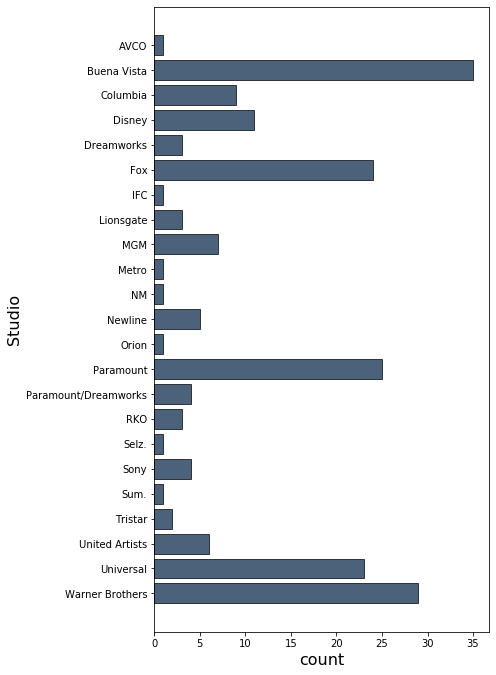

In [15]:
%matplotlib inline
studios_distribution.barh('Studio') 
# name of categorical variable
# will use the other as the length of the bars

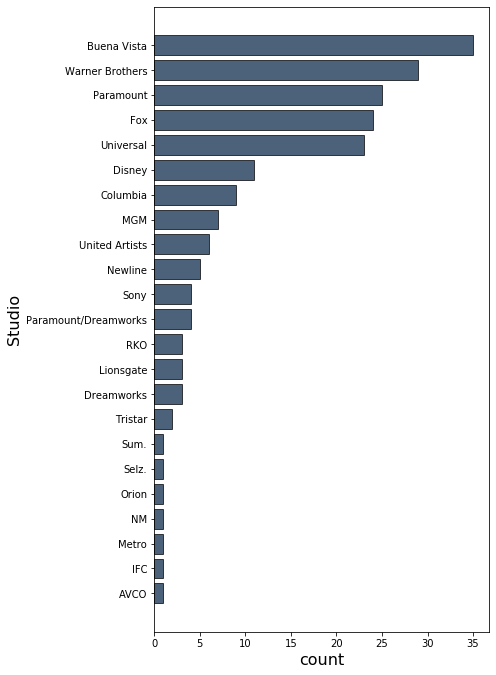

In [16]:
# that put things in alphabetical order, but that makes it hard to read!
studios_distribution.sort(1,descending=True).barh('Studio')

# Binning

In [17]:
ages = 2019 - top.column('Year')
top = top.with_column('Ages',ages)
top

Title,Studio,Gross,Gross (Adjusted),Year,Ages
Gone with the Wind,MGM,198676459,1796176700,1939,80
Star Wars,Fox,460998007,1583483200,1977,42
The Sound of Music,Fox,158671368,1266072700,1965,54
E.T.: The Extra-Terrestrial,Universal,435110554,1261085000,1982,37
Titanic,Paramount,658672302,1204368000,1997,22
The Ten Commandments,Paramount,65500000,1164590000,1956,63
Jaws,Universal,260000000,1138620700,1975,44
Doctor Zhivago,MGM,111721910,1103564200,1965,54
The Exorcist,Warner Brothers,232906145,983226600,1973,46
Snow White and the Seven Dwarves,Disney,184925486,969010000,1937,82


In [18]:
min(ages), max(ages)

(2, 98)

In [19]:
my_bins = make_array(0,5,10,15,25,40,65,100)

In [24]:
top.bin('Ages', bins = my_bins) # what values are counted in the first bin?
# this is a distribution! every movie appears one and only once in this

bin,Ages count
0,18
5,15
10,17
15,41
25,41
40,51
65,17
100,0


In [26]:
top.bin('Ages', bins=np.arange(0,101,25))

bin,Ages count
0,91
25,67
50,35
75,7
100,0


In [27]:
top.bin('Ages',bins=np.arange(0,60,25)) # what's weird here???
# we know there are movies older than 50!
# also, the 25-50 bin isn't the same as the last one!

bin,Ages count
0,91
25,68
50,0


In [29]:
top.where('Ages',50)
# ugh -- the last bin takes extra care
# if there are edges that are exactly at the last boundary, 
# it gets thrown in the previous bin -- just a choice by the programmers

Title,Studio,Gross,Gross (Adjusted),Year,Ages
Butch Cassidy and the Sundance Kid,Fox,102308889,627259300,1969,50


In [30]:
# how do we visualize? (back to slides)
top.bin('Ages',bins = my_bins)

bin,Ages count
0,18
5,15
10,17
15,41
25,41
40,51
65,17
100,0


# Histograms

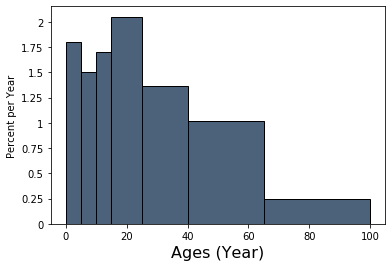

In [31]:
top.hist('Ages', bins = my_bins, unit = 'Year') # horizontal is drawn to scale
# compare 0-5 and 65+ bins --> area is roughly the same

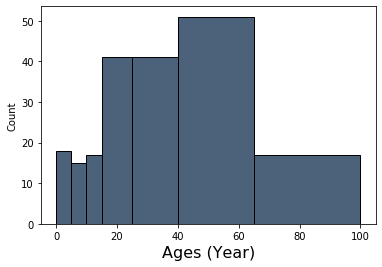

In [32]:
# THIS IS BAD
top.hist('Ages', bins = my_bins, unit = 'Year', normed=False)

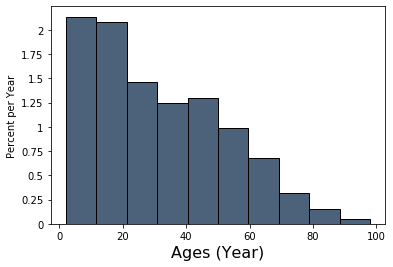

In [33]:
top.hist('Ages', unit='Year') # equal size bins, min-->max, divide by 10

# Density

In [ ]:
# Next class!